In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import colors
import folium
import matplotlib.pyplot as plt
from folium.features import DivIcon
import random
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
random.seed(42)

In [153]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', 'This pattern has match groups')
warnings.filterwarnings('ignore', 'The iterable function was deprecated in Matplotlib')

In [55]:
plt.rc("font", family='Malgun Gothic')
plt.rc('axes', unicode_minus = False)

In [56]:
df1 = pd.read_csv('../코로나19/서울시 코로나19 확진자 현황.csv', encoding='utf-8')
df1

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,5748,10.21.,25530,NaN,NaN,양천구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
1,5747,10.21.,25528,NaN,NaN,강동구,NaN,강남서초 지인모임,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
2,5746,10.21.,25525,NaN,NaN,강남구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
3,5745,10.21.,25517,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
4,5744,10.21.,25504,NaN,NaN,관악구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5743,5,1.31.,9,NaN,NaN,성북구,NaN,#5 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y
5744,4,1.30.,7,NaN,NaN,마포구,중국 우한시,해외 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y
5745,3,1.30.,6,NaN,NaN,종로구,NaN,#3 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y
5746,2,1.30.,5,NaN,NaN,중랑구,중국 우한시,해외 접촉,NaN,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y


In [57]:
df1.isnull().sum()

연번         0
확진일        0
환자번호       0
국적      5748
환자정보    5748
지역         0
여행력     5289
접촉력        0
조치사항    5748
상태       391
이동경로     228
등록일        0
수정일        0
노출여부       0
dtype: int64

In [58]:
df_19 = df1[['확진일', '지역', '접촉력', '상태']]
df_19 = df_19.dropna()
df_19

,확진일,지역,접촉력,상태
102,10.15.,서초구,기타 확진자 접촉,퇴원
104,10.15.,성북구,감염경로 조사중,사망
144,10.13.,중구,중랑구 이마트 상봉점,퇴원
150,10.13.,서대문구,중구 소재 콜센터,퇴원
172,10.11.,관악구,감염경로 조사중,퇴원
...,...,...,...,...
5743,1.31.,성북구,#5 접촉,퇴원
5744,1.30.,마포구,해외 접촉,퇴원
5745,1.30.,종로구,#3 접촉,퇴원
5746,1.30.,중랑구,해외 접촉,퇴원


In [59]:
df_19.isnull().sum()

확진일    0
지역     0
접촉력    0
상태     0
dtype: int64

In [60]:
groupby_location = pd.DataFrame(df_19.groupby(['지역'])['접촉력'].count())
groupby_location =groupby_location.reset_index()
groupby_location.columns = ['지역', '확진수']
groupby_location.head()

,지역,확진수
0,강남구,272
1,강동구,186
2,강북구,152
3,강서구,288
4,관악구,406


<AxesSubplot:title={'center':'약제품 수'}, xlabel='지역', ylabel='확진수'>

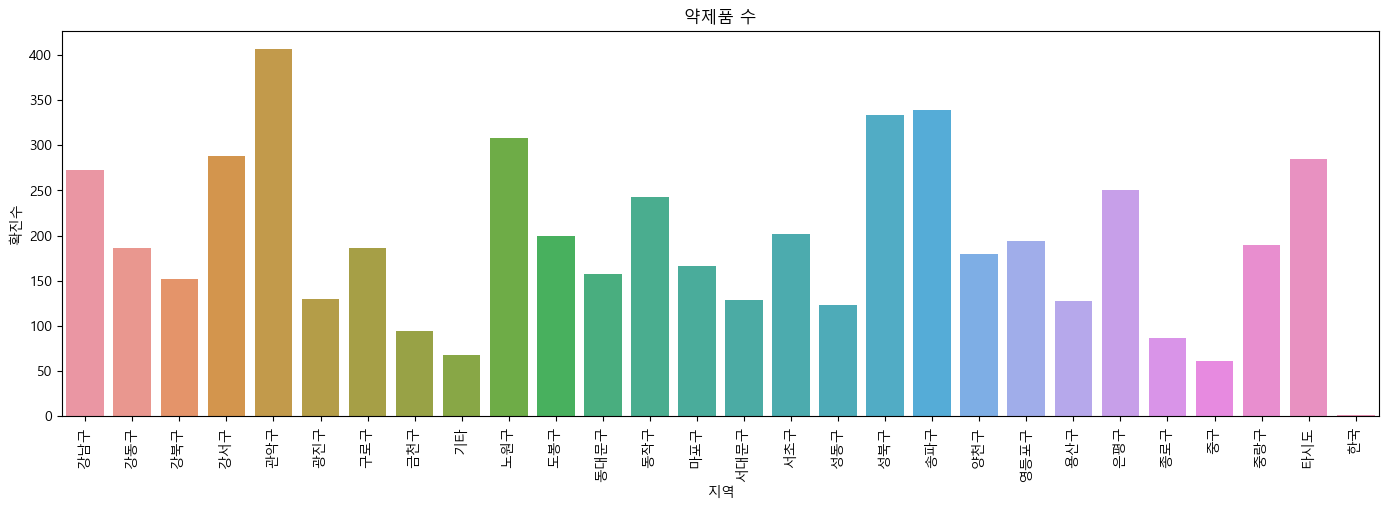

In [61]:
plt.figure(figsize=(17, 5))
plt.title("약제품 수")
plt.xticks(rotation=90)
sns.barplot(data=groupby_location, x='지역', y='확진수')

In [62]:
df_19.drop(df_19[df_19['지역'] == '한국'].index, inplace=True)
df_19.reset_index(drop=True)

,확진일,지역,접촉력,상태
0,10.15.,서초구,기타 확진자 접촉,퇴원
1,10.15.,성북구,감염경로 조사중,사망
2,10.13.,중구,중랑구 이마트 상봉점,퇴원
3,10.13.,서대문구,중구 소재 콜센터,퇴원
4,10.11.,관악구,감염경로 조사중,퇴원
...,...,...,...,...
5351,1.31.,성북구,#5 접촉,퇴원
5352,1.30.,마포구,해외 접촉,퇴원
5353,1.30.,종로구,#3 접촉,퇴원
5354,1.30.,중랑구,해외 접촉,퇴원


In [63]:
df_19

,확진일,지역,접촉력,상태
102,10.15.,서초구,기타 확진자 접촉,퇴원
104,10.15.,성북구,감염경로 조사중,사망
144,10.13.,중구,중랑구 이마트 상봉점,퇴원
150,10.13.,서대문구,중구 소재 콜센터,퇴원
172,10.11.,관악구,감염경로 조사중,퇴원
...,...,...,...,...
5743,1.31.,성북구,#5 접촉,퇴원
5744,1.30.,마포구,해외 접촉,퇴원
5745,1.30.,종로구,#3 접촉,퇴원
5746,1.30.,중랑구,해외 접촉,퇴원


In [68]:
groupby_location = pd.DataFrame(df_19.groupby(['지역'])['접촉력'].count())
groupby_location =groupby_location.reset_index()
groupby_location.columns = ['지역', '확진수']
groupby_location.tail()

,지역,확진수
22,은평구,250
23,종로구,87
24,중구,61
25,중랑구,190
26,타시도,285


In [65]:
df_19

,확진일,지역,접촉력,상태
102,10.15.,서초구,기타 확진자 접촉,퇴원
104,10.15.,성북구,감염경로 조사중,사망
144,10.13.,중구,중랑구 이마트 상봉점,퇴원
150,10.13.,서대문구,중구 소재 콜센터,퇴원
172,10.11.,관악구,감염경로 조사중,퇴원
...,...,...,...,...
5743,1.31.,성북구,#5 접촉,퇴원
5744,1.30.,마포구,해외 접촉,퇴원
5745,1.30.,종로구,#3 접촉,퇴원
5746,1.30.,중랑구,해외 접촉,퇴원


In [110]:
groupby_contact = pd.DataFrame(df_19.groupby(['접촉력'])['확진일'].count())
groupby_contact =groupby_contact.reset_index()
groupby_contact.columns = ['접촉력', 'counts']
groupby_contact2 = groupby_contact.sort_values(by=['counts'],ascending=False)
groupby_contact2

,접촉력,counts
138,기타 확진자 접촉,748
198,성북구 사랑제일교회 관련,635
279,확인 중,577
276,해외 접촉 추정,402
69,감염경로 조사중,298
...,...,...
95,강북구 확진자 접촉,1
92,강동구 확진자 접촉,1
13,#2621번 접촉,1
14,#29 접촉,1


In [165]:
groupby_contact3 = groupby_contact2.head(10)
groupby_contact3

,접촉력,counts
138,기타 확진자 접촉,748
198,성북구 사랑제일교회 관련,635
279,확인 중,577
276,해외 접촉 추정,402
69,감염경로 조사중,298
269,타시도 확진자 접촉,225
251,이태원 클럽 관련,139
65,8.15서울도심집회,122
172,리치웨이 관련,119
131,구로구 콜센터 관련,60


In [166]:
groupby_date = pd.DataFrame(df_19.groupby(['확진일'])['접촉력'].count())
groupby_date = groupby_date.reset_index()
groupby_date.columns = ['확진일', 'counts']
groupby_date2 = groupby_date.sort_values(by=['counts'],ascending=False)
groupby_date2.head(15)

,확진일,counts
197,8.29.,165
195,8.27.,158
194,8.26.,155
185,8.18.,150
182,8.15.,146
190,8.22.,138
186,8.19.,135
192,8.24.,134
184,8.17.,132
188,8.20.,124


In [162]:
groupby_date3 = groupby_date2.head(15)
groupby_date3

,확진일,counts
197,8.29.,165
195,8.27.,158
194,8.26.,155
185,8.18.,150
182,8.15.,146
190,8.22.,138
186,8.19.,135
192,8.24.,134
184,8.17.,132
188,8.20.,124


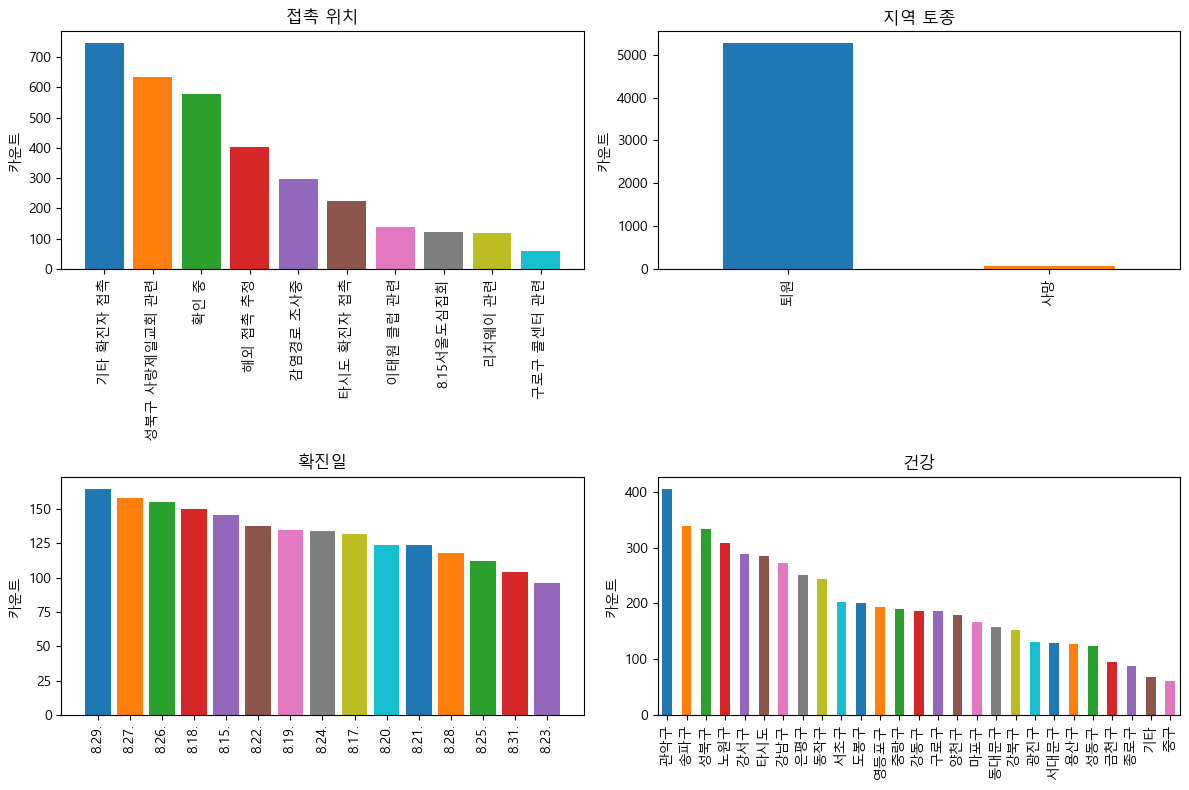

In [168]:
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

ax[0,0].bar(groupby_contact3['접촉력'], groupby_contact3['counts'], color=colors.TABLEAU_COLORS)
ax[0,0].set_xticklabels(groupby_contact3['접촉력'], rotation=90)
ax[0,0].set_title('접촉 위치')
ax[0,0].set_ylabel('카운트')


df_19.상태.value_counts().plot(kind='bar', ax=ax[0, 1],color=colors.TABLEAU_COLORS)
ax[0,1].set_title('지역 토종')
ax[0,1].set_ylabel('카운트')

ax[1,0].bar(groupby_date3['확진일'], groupby_date3['counts'], color=colors.TABLEAU_COLORS)
ax[1,0].set_xticklabels(groupby_date3['확진일'], rotation=90)
ax[1,0].set_title('확진일')
ax[1,0].set_ylabel('카운트')

df_19.지역.value_counts().plot(kind='bar', ax=ax[1,1],color=colors.TABLEAU_COLORS)
ax[1,1].set_title('건강')
ax[1,1].set_ylabel('카운트')

f.subplots_adjust(hspace=0.7)
f.tight_layout()
plt.show()

In [4]:
df2 = pd.read_csv('../코로나19/서울시 행정구역 시군구 정보 (좌표계_ WGS1984).csv', encoding='utf-8')
df2

,순번,시군구코드,시군구명_한글,시군구명_영문,ESRI_PK,위도,경도
0,1,11320,도봉구,Dobong-gu,0,37.665861,127.031767
1,2,11380,은평구,Eunpyeong-gu,1,37.617612,126.922700
2,3,11230,동대문구,Dongdaemun-gu,2,37.583801,127.050700
3,4,11590,동작구,Dongjak-gu,3,37.496504,126.944307
4,5,11545,금천구,Geumcheon-gu,4,37.460097,126.900155
5,6,11530,구로구,Guro-gu,5,37.495486,126.858121
6,7,11110,종로구,Jongno-gu,6,37.599100,126.986149
7,8,11305,강북구,Gangbuk-gu,7,37.646995,127.014716
8,9,11260,중랑구,Jungnang-gu,8,37.595379,127.093967
9,10,11680,강남구,Gangnam-gu,9,37.495985,127.066409


In [ ]:
df_19

In [170]:
df_merge = pd.merge(df_19, df2, left_on='지역', right_on='시군구명_한글')
df_merge

,확진일,지역,접촉력,상태,순번,시군구코드,시군구명_한글,시군구명_영문,ESRI_PK,위도,경도
0,10.15.,서초구,기타 확진자 접촉,퇴원,16,11650,서초구,Seocho-gu,16,37.476953,127.037810
1,10.08.,서초구,기타 확진자 접촉,퇴원,16,11650,서초구,Seocho-gu,16,37.476953,127.037810
2,10.08.,서초구,기타 확진자 접촉,퇴원,16,11650,서초구,Seocho-gu,16,37.476953,127.037810
3,10.07.,서초구,감염경로 조사중,퇴원,16,11650,서초구,Seocho-gu,16,37.476953,127.037810
4,10.06.,서초구,해외 접촉 추정,퇴원,16,11650,서초구,Seocho-gu,16,37.476953,127.037810
...,...,...,...,...,...,...,...,...,...,...,...
4998,3.7.,양천구,#935 접촉자,퇴원,21,11470,양천구,Yangcheon-gu,22,37.527062,126.856153
4999,3.7.,양천구,#6937 접촉자,퇴원,21,11470,양천구,Yangcheon-gu,22,37.527062,126.856153
5000,3.7.,양천구,타시도 확진자 접촉,퇴원,21,11470,양천구,Yangcheon-gu,22,37.527062,126.856153
5001,3.1.,양천구,성동구 아파트 관련,퇴원,21,11470,양천구,Yangcheon-gu,22,37.527062,126.856153


In [179]:
import json
import requests
url = 'https://raw.githubusercontent.com/LeeKyumhi/seoul-maps/master/juso/2015/json/seoul_municipalities_geo_simple.json'
geo_json = requests.get(url).json()

In [180]:
locs = {
    '종로구': (37.59, 126.97),   
    '양천구':(37.52, 126.854),
    '강서구':  (37.562, 126.825),
    '강남구': (37.494, 127.059),
    '강동구':  (37.549, 127.143),
    '광진구': (37.548, 127.084),
    '관악구': (37.472, 126.943),
    '마포구':  (37.556, 126.91),
    '송파구':  (37.507, 127.117),
    '금천구':   (37.462, 126.903),
    '영등포구': (37.552, 126.907),
    '서초구': (37.476, 127.024),
    '성북구': (37.601, 127.024),
    '구로구': (37.4973, 126.8544),
    '서대문구':(37.5765, 126.9387),
    '노원구':  (37.6512, 127.0749), 
    '용산구': (37.5299, 126.9801),
    '중구':  (37.5618, 126.9964),
    '은평구':  (37.6199, 126.9244),
    '중랑구':   (37.5992, 127.0955),
    '성동구': (37.5506, 127.0432),
    '동작구': (37.5020, 126.9514),
    '강북구': (37.6397, 127.01228),
    '동대문구': (37.5812, 127.0507),        
}


In [181]:
from streamlit_folium import st_folium
import streamlit as st

map = folium.Map(zoom_start=13,tiles="OpenStreetMap")
map.choropleth(geo_data = geo_json,
               data = df_cafe_gu['상호명'],
               columns = (cafe_brands.index, df_cafe_guu['상호명']),
               legend_name="지역구별 커피 업종 수",
               fill_color = 'PuBu',
               key_on = 'feature.properties.SIG_KOR_NM',
               fill_opacity=0.4,
               line_opacity=0.7,
               highlight=True)

# for n in geo_df.index:
#     popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
#     if geo_df.loc[n, '브랜드명'] == '스타벅스':
#         icon_color = 'green'
#     elif geo_df.loc[n, '브랜드명'] == '이디야':
#         icon_color = 'blue'    
#     elif geo_df.loc[n, '브랜드명'] == '할리스':
#         icon_color = 'red'
#     else: 
#         icon_color = 'black'    
#     folium.CircleMarker(
#         location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
#         radius=3,
#         popup=popup_name,
#         color= icon_color,
#         fill=True,
#         fill_color=icon_color
#     ).add_to(map)
# folium.LayerControl().add_to(map)
# for key, value in locs.items():
#     folium.map.Marker(
#         [value[0], value[1]],  
#         icon=DivIcon(
#             icon_size=(0, 0),
#             icon_anchor=(0, 0),
#             html='<div\
#                     style="\
#                         font-size: 0.8rem;\
#                         color: black;\
#                         background-color:rgba(255, 255, 128, .5);\
#                         width:85px;\
#                         text-align:center;\
#                         margin:0px;\
#                     "><b>'
#             + key + ': ' + str(cafe_brands_info.loc[key, '상호명'].sum())
#             + "<br/><span style='color:green; margin: 0px;'>스타벅스: "
#             + str(cafe_brands_info.loc[(key, '스타벅스'), '상호명']) + '</span>'
#             + "<br/><span style='color: blue; margin: 0px;'>이디야: "
#             + str(cafe_brands_info.loc[(key, '이디야'), '상호명']) + '</span>'
#             + "<br/><span style='color: purple; margin: 0px;'>투썸플레이스: "
#             + str(cafe_brands_info.loc[(key, '투썸플레이스'), '상호명']) + '</span>'
#             + "<br/><span style='color: red; margin: 0px;'>할리스: "
#             + str(cafe_brands_info.loc[(key, '할리스'), '상호명']) + '</span>'
#             + '</b></div>',
#         )).add_to(map)

popup= folium.LatLngPopup()
map.add_child(popup)

map


NameError: name 'df_cafe_gu' is not defined